In [ ]:
# Введем себе за правило сразу же импортировать нужные (для большей части задач) библиотеки - примечание Артура Артикова

import pandas as pd
import numpy as np
import seaborn as sns

# _EDA-4. Статистические тесты_
# 1. Введение

В предыдущих модулях мы познакомились с основами разведывательного анализа данных (EDA) и изучили базовую математическую статистику в контексте EDA — научились рассчитывать среднее, медиану и моду. В этом модуле мы научимся делать выводы об этих величинах, если известны данные не обо всех объектах, а только о части из них.

Статистические тесты — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных.

Вам будут встречаться разнообразные бизнес-задачи, и статистические тесты позволят избегать ошибочных решений. Cтатистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. Чтобы правильно их использовать, требуются определённые знания, в том числе в области математической статистики. Dажно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

_Модуль можно условно разделить на две части:_

* Первая посвящена теории: мы изучим основные определения и понятия, связанные со статистическими тестами.
* Во второй части мы перейдём к практическим примерам и задачам и решим их на Python.

__В МОДУЛЕ МЫ РАЗБЕРЁМ:__

* что такое статистическая гипотеза;
* какие бывают статистические тесты;
* что такое значимость, уровень значимости, ошибки первого и второго рода.

__ВЫ НАУЧИТЕСЬ:__

* различать типы гипотез;
* выдвигать собственные гипотезы;
* самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки;
* проводить различные статистические тесты на языке Python.

# 2. Необходимость в статистических тестах

Cтатистические тесты часто используют для принятия бизнес-решений, всё же бывают ситуации, когда обращаться к ним необязательно. О таких ситуациях мы поговорим отдельно в конце модуля.

В этом и последующих юнитах мы рассмотрим случаи, когда без статистических тестов не обойтись. Для начала введём понятия «генеральной совокупности» и «выборки» — они пригодятся нам в дальнейших рассуждениях.

__Генеральной совокупностью__ называется всё множество интересующих нас объектов, а __выборкой__ — случайное подмножество этого множества.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/61fe66ab8bfec7626dc881ce68a23551/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_2_1.png)

Мы уже знаем, что на основе выборки (части наблюдений) можно измерить следующие показатели:
* выборочное среднее (центральная мера распределения);
* выборочное стандартное отклонение (мера разброса);
* выборочная пропорция.


Однако на самом деле нас всегда интересуют параметры генеральной совокупности:
* истинное среднее — математическое ожидание (μ, «мю»);
* истинное стандартное отклонение (σ, «сигма»);
* истинная пропорция (p).

Например, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

__Выборочная статистика__ — это случайная величина, так как рассчитана на случайной выборке. Например, значение среднего на двух разных выборках будет разным.

__Параметр генеральной совокупности__ — это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.


__Бинес задача__

_Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. Команда Data Science должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам._

Как тогда поступить?
Выходом будет:
1. Показать рекомендации только части покупателей (выборке).
2. Замерить средний чек на полученной выборке (пусть он получится равным _N_  рублей).
3. Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.
4. Сделать вывод, запускать ли рекомендательную систему на весь магазин.


* Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
* Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

__## Резюмируем:__

* Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.
* тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.
* Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.

# 3. Понятие статистической гипотезы

__Статистическая гипотеза — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.__

Примечание. Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

## АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ

Общий алгоритм проверки гипотезы состоит из шести этапов:

1. Построение нулевой и альтернативной гипотез.
2. Выбор уровня значимости _a_.
3. Сбор данных для проверки гипотезы.
4. Выбор статистического теста.
5. Проведение статистического теста, вычисление _p-value_.
6. Сравнение _p-value_ c уровнем значимости _a_ и вывод, отклонить или не отклонить нулевую гипотезу.


## НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ

Проведение статистических тестов начинается с формулирования двух конкурирующих между собой статистических гипотез — нулевой и альтернативной.

В качестве нулевой гипотезы (H1) обычно берётся утверждение об отсутствии эффекта, т. е. тех изменений, которых мы ожидали, нет. Пример нулевой гипотезы: рекомендательная система не влияет на средний чек покупки.

В качестве альтернативной гипотезы (H1) берётся утверждение о наличии эффекта (обратное нулевой гипотезе), т. е. те изменения, которых мы ожидали, есть. Пример альтернативной гипотезы: рекомендательная система влияет на средний чек покупки.

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

* отклоняем нулевую гипотезу в пользу альтернативной (делаем вывод, что эффект есть);
* не отклоняем нулевую гипотезу, так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).


Существует три варианта формулировки нулевой и альтернативной гипотез. Давайте рассмотрим формулировки вместе с их математической интерпретацией. Пусть μ1 — средний чек покупки без просмотра рекомендаций, μ2 — средний чек покупки после просмотра рекомендаций.

Примечание. Ещё раз отметим, что μ1 и μ2 — средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), т. е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

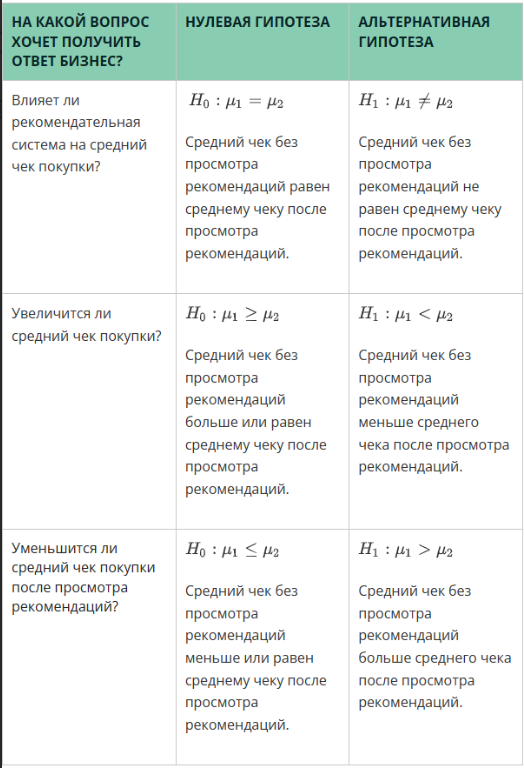

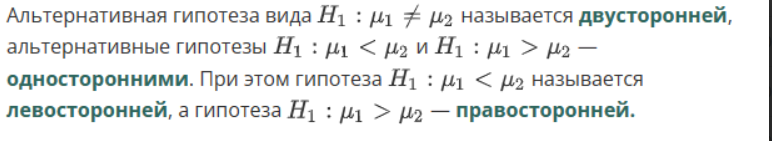

Рассмотрим тонкости формулировок гипотез более подробно.

1. В качестве первого примера возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций?».

Нулевая и альтернативная гипотезы будут следующими:

 — 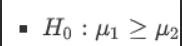 после внедрения рекомендаций средний чек уменьшился или не изменился.

 — 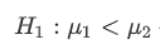 после внедрения рекомендаций средний чек увеличился.

Пусть мы сделали две выборки покупок (без и после просмотра рекомендаций) и получили следующие средние значения чека:

без просмотра рекомендаций - m1 = 960 рублей;

после просмотра рекомендаций - m2 = 1250 рублей.

Проверка этих гипотез позволит определить, существует (статистически значима) ли разница в размере чеков в 290 рублей на генеральных совокупностях. То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях  m1 и m2.

2. Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. Мы знаем, что содержание натрия должно быть не более 300 мг на 100 г соуса, и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия (_μ_), должно быть меньше или равно 300 мг на 100 г.

Тогда нулевая и альтернативная гипотезы будут следующими:
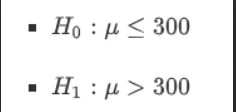

Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. Предположим, что среднее значение содержания натрия в выборке составило m = 305 мг на 100 г соуса.

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия (μ) отличается от заявленного на упаковке. Возможно, что измеренное нами выборочное значение _m_ является следствием погрешностей и случайностей.

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. Нулевая гипотеза — это утверждение об отсутствии эффекта, который мы хотим проверить, а альтернативная — утверждение о наличии такого эффекта.

# 4. Статистическая значимость

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — насколько статистически значимы полученные нами результаты.

## ОШИБКИ I И II РОДА

При проверке гипотезы возможно допустить ошибку одного из двух видов:

Ошибка I (первого) рода: отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется α-ошибкой, или ложноположительным результатом.
Ошибка II (второго) рода: неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется β-ошибкой, или ложноотрицательным результатом.
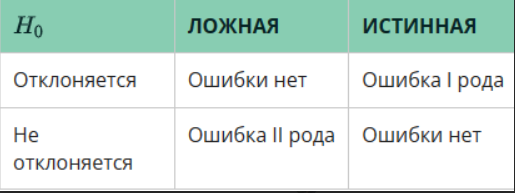


В примере про предварительную проверку рекомендательной системы на выборке покупателей ошибками первого и второго рода будут следующие ситуации:

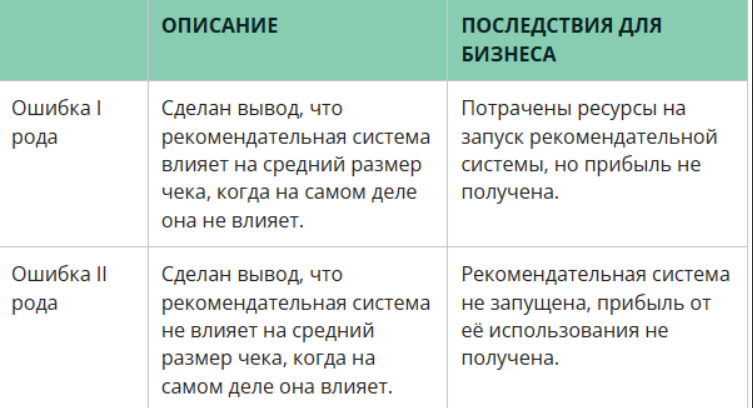

__Примечание. Вероятность не допустить ошибку II рода () ещё называют мощностью теста. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).__

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

Отнести образец к классу 1, когда он на самом деле относится к классу 0. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.
Не отнести образец к классу 1, когда он на самом деле относится к классу 1. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.

## СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно график оценки плотности ядра (Kernel Density Estimation, KDE). Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

График плотности вероятности построен так, что вся площадь под кривой равна 1 — это вероятность всех возможных значений размера чека. Это следует из основного правила теории вероятностей: сумма вероятностей всех исходов (всех возможных значений чека) всегда равна 1.

Площадь под кривой на интервале от a до b (голубая область) соответствует вероятности получить среднее значение от a до b (на графике ниже такая вероятность ):

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/ef46dd56a235f6692f67c1443a3e6408/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_4_2.png)

Например, если a=350, а b=500, это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне от 350 до 500 рублей составляет 0.3.

__Например, если , а , это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне от 350 до 500 рублей составляет 0.3.__


Рассмотрим это определение на примере ответа на вопрос «Средний чек покупки в онлайн-магазине больше 500 рублей?». Гипотезы будут следующими:

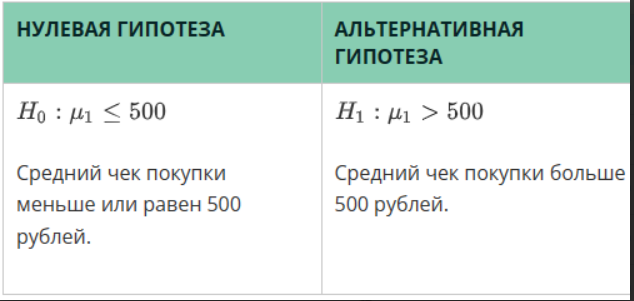

Пусть на выборке мы получили средний размер чека 700 рублей. Отметим это значение на графике:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d7dd2713b4069ed6ee3c94b8f1f7e0e6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_4_4.png)

Какова вероятность получить такой же (700 рублей) или ещё больший средний чек при условии, что средний чек равен 500 рублям? Этой вероятностью будет площадь под кривой от 700 к большим значениям (p-value = p):

Чем больше было бы число, которое мы получили на выборке:

* тем меньше была бы площадь под кривой, т. е. меньше полученное значение p-value;
* тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека — 500 рублей или меньше.

__Важно понимать, что p-value — это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.__

__Уровень значимости__ — это пороговая вероятность допустить ошибку I рода (вероятность отклонить нулевую гипотезу, когда она верна). Обычно это число обозначается за α.

Если полученное значение p-value меньше заранее заданного уровня значимости α, мы отвергаем нулевую гипотезу. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут α=0.05. Это означает, что мы готовы к 5 % риску допустить ошибку I-ого рода (то есть сделать вывод, что эффект есть, хотя на самом деле его нет).

Итак:

Если полученное p-value ниже уровня значимости (p<α), результаты статистически значимы и согласуются с альтернативной гипотезой.
Если полученное p-value выше уровня значимости (p>α), результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу.

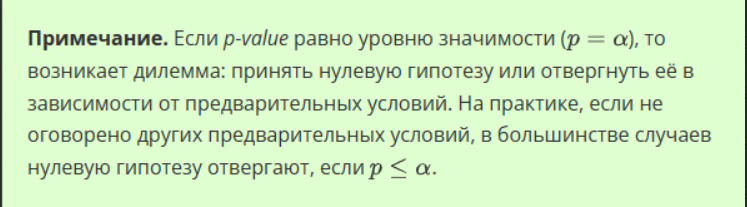

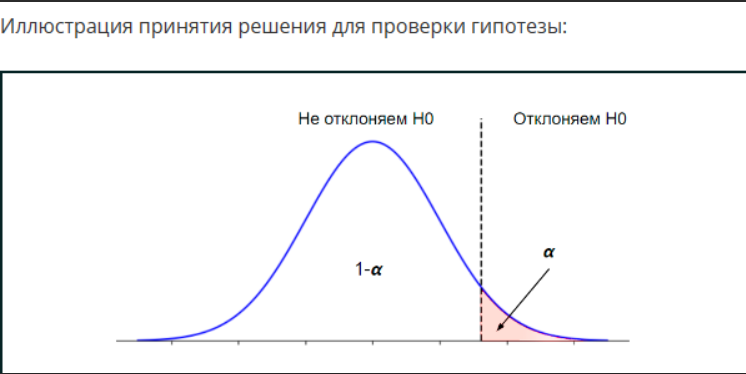

Примечание. Раньше специалисты по статистике вручную рассчитывали p-value по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. Теперь мы можем просто воспользоваться готовыми функциями из библиотек SciPy и Statsmodels для языка Python

В нашем примере p-value = 0.03 (пока мы опустили детали вычисления). Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на 200 и более рублей, составляет 0.03. Иллюстрация выглядит так:
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/7d6ea7d78f52ec028c61377848aebdbc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_4_7.png)

Площадь жёлтой области равняется p-value (0.03), площадь красной области равняется  (0.05). P-value меньше α — значит, мы можем отвергнуть нулевую гипотезу в пользу альтернативной и сказать, что средний чек покупки больше 500 рублей.

Выше мы приводили иллюстрацию принятия решения для проверки односторонней (правосторонней) гипотезы:

одна область отклонения нулевой гипотезы (справа);
площадь области = α.
Аналогичная иллюстрация для левосторонней гипотезы:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/3d40d1a96118853e87381f4e7e517ab1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_4_9.png)

Для двусторонней гипотезы иллюстрация будет следующей:

две области отклонения нулевой гипотезы (справа и слева);
площадь каждой области = α/2.
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d30af85960d1923f364cdf8c5e729faa/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_4_10.png)

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны — и в большую, и в меньшую. В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах.

Значение α необходимо выбрать до начала исследования совместно с бизнес-заказчиком. Единственно верного значения  не существует — оно зависит от бизнес-задачи. Обычно выбирают 0.01, 0.05 или 0.10.

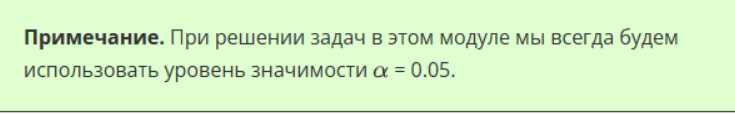

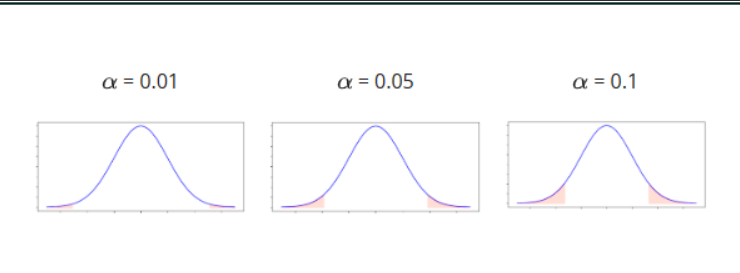

Чем более нежелательно допустить ошибку I рода, тем меньшее значение α стоит выбирать. Например, уровень значимости при испытаниях нового автомобильного оборудования будет ниже, чем уровень значимости при исследовании новой версии сайта.

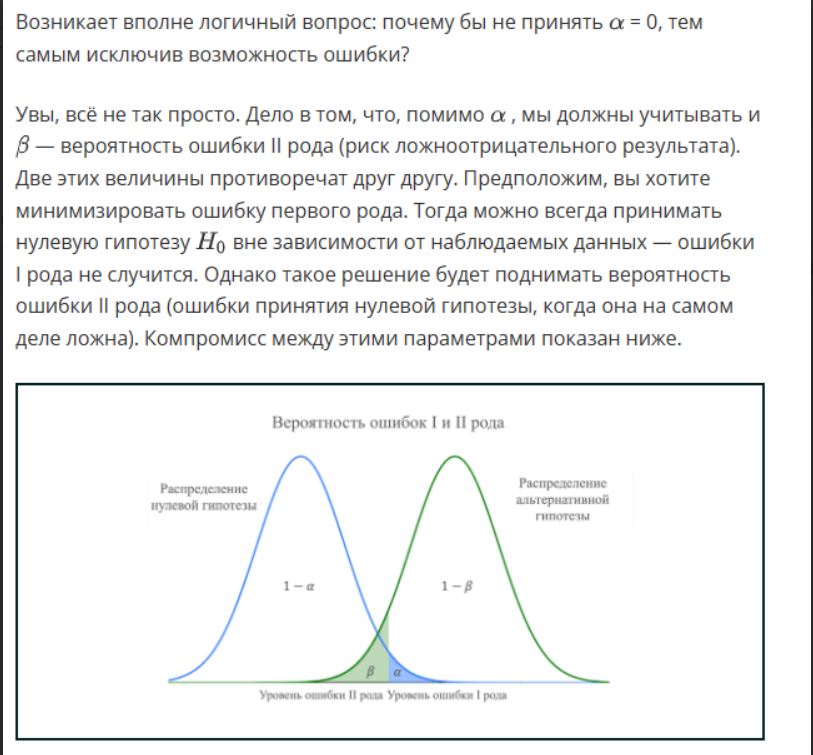

На рисунке выше мы видим две кривые: синим показана вероятность получить наблюдаемые данные, если верна нулевая гипотеза; зелёным — вероятность получить их, если верна альтернативная гипотеза. Ошибки I и II рода возникают там, где эти два распределения перекрываются. Например, в точке пересечения зелёной и синей линий вероятности получить наблюдаемые данные равны — выбрать между гипотезами будет затруднительно.

Область, заштрихованная синим цветом, представляет собой - α  — вероятность ошибки I рода, а область, заштрихованная зелёным цветом  - β — , вероятность ошибки II рода. Установив частоту ошибок I рода, вы также косвенно влияете на частоту ошибок II рода.

# 5.Статистические тесты

## Основные типы статистических тестов
Задача дата-сайентиста в том, чтобы выбрать подходящий тест и провести его, получив на выходе p-value. Далее мы разберём, от чего зависит выбор теста, а также их основные типы.
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f47f7bdd361840dcaae195b5dee4e4f7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_5_1.png)

Выбор статистического теста для количественных признаков зависит от ряда факторов:

количества анализируемых групп (выборок): одна, две, три и более групп;
зависимости групп: зависимые и независимые;
знания о распределении признаков по нормальному закону.

## КРИТЕРИЙ ВЫБОРА ТЕСТА: КОЛИЧЕСТВО ГРУПП
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/cd502b590e6e8502a53e439eeca74b33/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_5_2.png)

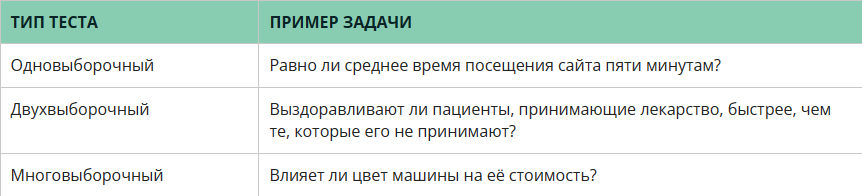



## КРИТЕРИЙ ВЫБОРА ТЕСТА: ЗАВИСИМОСТЬ ГРУПП

В независимых группах набор объектов в одну группу проходит независимо от набора объектов в другие группы.
В зависимых группах каждый объект одной группы связан с объектом в другой группе. Такая ситуация возникает, например, когда мы анализируем признаки в динамике.

Тесты, разработанные для сравнения независимых групп, называются непарными, тесты для сравнения зависимых групп — парными.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/385f294c9224eeddee86138be9449c18/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_5_3.png)

## КРИТЕРИЙ ВЫБОРА ТЕСТА: РАСПРЕДЕЛЕНИЕ ПРИЗНАКА ПО НОРМАЛЬНОМУ ЗАКОНУ

Если признаки распределены по нормальному закону, к ним можно применять параметрические тесты — статистические методы, основанные на параметрах нормального распределения (среднее значение, стандартное отклонение).

Если мы знаем, что признаки не распределены нормально или у нас нет информации об их распределении, необходимо использовать непараметрические тесты. Их можно применять на любых количественных признаках независимо от вида их распределения. Непараметрические методы менее чувствительны к выбросам в данных.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/adadc8895664bce5c994310c3fab3f1f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_5_4.png)


Непараметрические методы можно применять и на нормально распределённых данных, но в таком случае они будут менее мощными (будут обладать меньшей мощностью теста), чем параметрические.

## АЛГОРИТМ ВЫБОРА ТЕСТА ДЛЯ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/49d157463ab89848df5673342779a847/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_5_5.png)

Например, в задаче, зависит ли средний чек покупки от пола покупателей, шаги по выбору теста будут такими:

Какой тип у признака «средний чек»?
Количественный.
Сколько сравниваемых групп?
Две (мужчины и женщины).
Группы зависимы?
Нет, так как объекты в выборках не повторяются.
Признак распределён по нормальному закону?
Если да, нужен двухвыборочный t-критерий.
Если нет, нужен U-критерий Манна — Уитни.

Примечание. Для сравнения групп одновременно по нескольким признакам используют методы двумерного и многофакторного анализа, например, регрессионный анализ, многофакторный дисперсионный анализ и др.

Пример бизнес-задачи: оценка влияния уровня образования (среднее профессиональное, высшее, научная степень) на зарплату и число полётов за границу в год.

# 6.Проверка на нормальность

Начиная с этого раздела, мы будем практиковаться на Python. Для этого нам понадобятся две новых библиотеки:
[SciPy](https://docs.scipy.org/doc/scipy/index.html) — библиотека для научных и инженерных расчётов.
[Statsmodels](https://www.statsmodels.org/stable/index.html) — библиотека для статистических исследований

In [ ]:
!pip install SciPy
!pip install Statsmodels

## НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Многие процессы в природе следуют нормальному закону распределения: рост человека, вес при рождении, артериальное давление, размер ноги и др.

Нормальное распределение (распределение Гаусса) характеризуется двумя числами:
* средним значением μ (mu);
* стандартным отклонением σ (sigma).

Примеры нормальных распределений с разными μ и σ :

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/3d9c79fc492d3c412cddce4f5c36a02e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_6_1.png)

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

* Один пик в центре и симметричные боковые стороны (одномодальное распределение).
* Среднее и медиана равны и расположены в центре распределения.
* Отклонение значений от среднего подчиняется правилу трёх сигм:
* * 68 % значений находятся в пределах одного стандартного отклонения от среднего;
* * 95 % значений — в пределах двух стандартных отклонений;
* * 99.7% значений — в пределах трёх стандартных отклонений.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d06f1b5b368db56a94080ad7bc31ece6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_6_2.png)


## ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

__ГИСТОГРАММА__

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/70ab0b9089303b0cb7f101d5536f3b6c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_6_3.png)


Напомним, что в Python гистограмму можно построить с помощью функции histplot() пакета seaborn. Параметр kde=True добавляет к гистограмме график оценки плотности ядра.


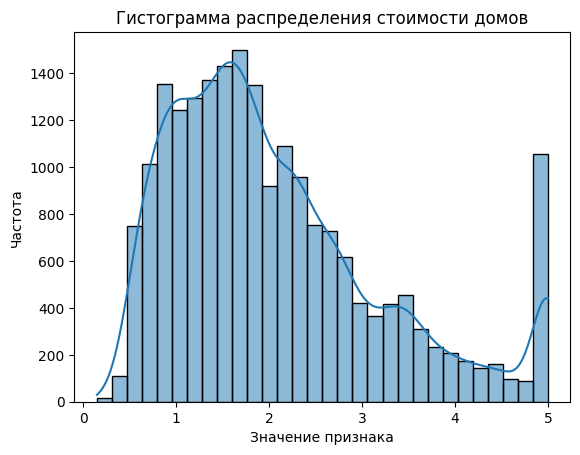

In [ ]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# uploading data | загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

plt.show();

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

__КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК__

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. [Хороший гайд по Q-Q Plots](https://habr.com/ru/articles/578754/).

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f08c932f36f4e95fcf39366c33fe9494/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_6_5.png)

В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

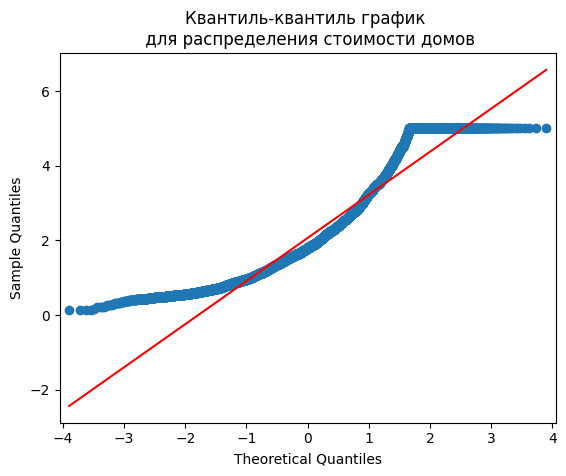

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

dataset = datasets.fetch_california_housing()
data=dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

plt.show();

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

__СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ__

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

Нулевая: данные распределены нормально.
Альтернативная: данные не распределены нормально.

[Детали расчёта p-value в тесте Шапиро — Уилка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0)

Если p-value теста больше уровня значимости α, то мы считаем, что данные распределены нормально.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON__

В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

_Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value._


Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:


In [ ]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

if p <= alpha:
  print('Распределение не нормальное')
else:
  print('Распределение нормальное')




p-value = 0.015
Распределение не нормальное


Мы рассмотрели графические и статистические методы проверки на нормальность. Их можно использовать как вместе, так и по отдельности.

Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, тест [Д’Агостино](https://lms-cdn.skillfactory.ru/assets/courseware/v1/0fcd5152bed6325a2812c9e295847038/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/guid_normal_tets.pdf) или [тест Колмогорова — Смирнова](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0). У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. [Ещё больше способов проверки на нормальность.](https://questu.ru/articles/197465/)





In [ ]:
import scipy.stats as stats

data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]
alpha = 0.05

_, p = stats.shapiro(data)

print('p-value = %.2f' % (p))

if p <= alpha:
  print('Распределение не нормальное')
else:
  print('Распределение нормальное')

p-value = 0.41
Распределение нормальное


# 7. Параметрические тесты

В предыдущем юните мы рассмотрели методы проверки на нормальность. Она необходима, чтобы выбрать, какие статистические тесты использовать:

* параметрические, если распределение признака нормальное;
* или непараметрические, если распределение признака отлично от нормального или о нём нет информации.
В этом юните мы:

* разберём параметрические тесты, которые упомянули в алгоритме выбора статистического теста для количественных признаков;
* для каждого теста приведём описание функции, которая реализует его в Python-библиотеках, и пример использования на Python.

Примечание. При проведении тестов в этом модуле мы не будем вдаваться в детали расчётов — все они реализованы в библиотеках Python и не выполняются вручную. Задача специалиста по Data Science — понимать область применения каждого из тестов и уметь интерпретировать их результаты. Детали расчётов можно посмотреть в следующих источниках:

1. [С. Гланц. Медико-биологическая статистика](https://lms-cdn.skillfactory.ru/assets/courseware/v1/847415e20d047d021d9d7df064cb940f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/glantz_mbs.pdf)

2. [М. Б. Лагутин. Наглядная математическая статистика.](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d8530f267817a83a8d11c84e90c606fe/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/lagutin_naglyadnaya_matematicheskaya_statistika.pdf)

Все функции, которые реализуют параметрические тесты в библиотеках Python:

* на вход принимают:
  * выборки или их параметры;
  * параметры проверяемой гипотезы;
* на выход отдают:
  * уровень значимости p (p-value);
  * дополнительные параметры (в большинстве случаев они нам не нужны).

Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

_Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением._

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

Основные входные параметры:

* a — выборочные данные;
* popmean — ожидаемое среднее значение признака;
* alternative — вид альтернативной гипотезы:
  * ‘two-sided’ (двусторонняя, используется по умолчанию);
  * ‘less’ (левосторонняя);
  * ‘greater’ (правосторонняя).


Примеры задач, когда может понадобиться использование теста:

* Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
* Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

## ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батареи (μ) меньше или равно 40 часам.
  H0: μ <=40

* Альтернативная гипотеза: среднее время работы батареи (μ) больше чем 40 часов.
  H1: μ > 40

Решение на Python:


In [ ]:
import scipy.stats as stats

alpha = 0.05

data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ
_Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах._

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

Основные входные параметры:

* a, b — выборочные данные двух групп;
* alternative — вид альтернативной гипотезы:
  * ‘two-sided’ (двусторонняя, используется по умолчанию);
  * ‘less’ (левосторонняя);
  * ‘greater’ (правосторонняя);
* equal_var — равны ли дисперсии в группах (по умолчанию равны).

Ограничения применения теста:

* Группы должны быть независимыми.
* Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра equal_var.

Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях levene() и bartlett() модуля stats библиотеки scipy:

* Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
* На вход функции получают выборочные данные.
* На выход функции отдают p-значение.


Более подробная информация об этих тестах: [тест Бартлетта](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D0%B0), [тест Левена](https://ami.nstu.ru/~headrd/Tests_of_Mean_and_Cov.htm).

  * Тест можно применять, только если данные в обеих выборках распределены нормально.

  Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

* Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
* Есть две выборки студентов из двух университетов. Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

* Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

* Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

_Решение_

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» (μ1) меньше или равно среднему времени работы батарей «Заряд» (μ2):
  H0: μ1 <= μ2

Альтернативная гипотеза: среднее время работы батарей «Планета» (μ1) больше среднего времени работы батарей «Заряд» (μ2):
  H1: μ1 > μ2

In [ ]:
import scipy.stats as stats
import numpy as np

alpha = 0.05
# загружаем данные

data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')


# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах __stats.ttest_ind__ важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» (μ1) меньше среднего времени работы батарей «Планета» (μ2):
  H1: μ2 < μ1

то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):

```python
_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)
```
При этом значение p-value не изменяется. Вывод получается таким же.

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

__Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.__

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

__Основные входные параметры:__

* sample1, sample2, … — выборочные данные групп.

__Ограничения применения теста:__

* Группы должны быть независимыми.
* Тест можно выполнять на группах с равной дисперсией.
  Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.
* Тест можно применять, только если данные в обеих выборках распределены нормально.
  Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

* Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
* Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

* Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
* Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
* Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
* Нулевая гипотеза: среднее время работы батарей «Заряд» (μ1), «Планета» (μ2) и «Энергия» (μ3) одинаковое:
  H0: μ1 = μ2 = μ3
* Альтернативная гипотеза: среднее время работы батарей «Заряд» (μ1), «Планета» (μ2) и «Энергия» (μ3) не одинаковое:
  H1: μ1 != μ2 != μ3




In [ ]:
import scipy.stats as stats

alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)
print('p-value = {:.3f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.__

## ПАРНЫЙ T-КРИТЕРИЙ

_Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах._

Парный t-критерий реализован в функции [ttest_rel()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) в модуле stats библиотеки scipy.

Основные входные параметры:

* a, b — выборочные данные двух зависимых групп;
* alternative — вид альтернативной гипотезы:
  * ‘two-sided’ (двусторонняя, используется по умолчанию);
  * ‘less’ (левосторонняя);
  * ‘greater’ (правосторонняя).

__Ограничения применения теста:__

* Тест можно применять, только если данные в обеих выборках распределены нормально.
Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

__Примеры задач, когда может понадобиться использование теста:__

* Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
* Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

__РЕШЕНИЕ__

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Планета» (μ1) меньше или равно среднему времени работы батарей «Заряд» (μ2):

  H0: μ1 <= μ2

* Альтернативная гипотеза: среднее время работы батарей «Планета» (μ1) больше среднего времени работы батарей «Заряд» (μ2):

  H1: μ1 > μ2


In [ ]:
import scipy.stats as stats
import numpy as np

alpha = 0.05
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative = 'greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
  print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: батареи «Планета» работают дольше, чем батареи «Заряд».

__ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ__

__Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями__ используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции [AnovaRM()](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html) в модуле stats библиотеки statsmodels.

Основные входные параметры:

* data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
* within — название колонки с id группы;
* subject — название колонки с id объекта;
* depvar — название колонки со значением признака.

__Ограничения применения теста:__

* Тест можно применять, только если данные в обеих выборках распределены нормально.

  Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

__Примеры задач, когда может понадобиться использование теста:__

* Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
* Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

_БИЗНЕС-ЗАДАЧА_

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

* Батареи «Заряд»: 36, 45, 41, 41, 35.
* Батареи «Планета»: 32, 34, 42, 48, 43.
* Батареи «Энергия»: 41, 39, 35, 34, 52.

__РЕШЕНИЕ__

Сформулируем гипотезы в математическом виде:
* Нулевая гипотеза: среднее время работы батарей «Заряд» (μ1), «Планета» (μ2) и «Энергия» (μ3) одинаковое.
  H0: μ1 = μ2 = μ3
* Альтернативная гипотеза: среднее время работы батарей «Заряд» (μ1), «Планета» (μ2) и «Энергия» (μ3) не одинаковое.
  H1: μ1 != μ2 != μ3





In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                     'object_id': np.tile([1, 2, 3, 4, 5], 3),
                     'value' : [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})
# проводим тест
print(AnovaRM(data = data,
              depvar='value',
              subject='object_id',
              within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

__Вывод:__ у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/dd16cab92932ccfca3c04b4265a0509e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_7_1.png)

In [ ]:
import scipy.stats as stats

alpha = 0.05
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
  print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


In [ ]:
import scipy.stats as stats
import numpy as np

alpha = 0.05
data_before = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_after = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

_, p = stats.ttest_rel(data_before, data_after, alternative = 'greater')
print('p-value = {:.3f}'.format(p))

p-value = 0.213


# 8. Непараметрические тесты

В предыдущем юните мы рассмотрели параметрические методы для нормально распределённых данных, а в этом поговорим о непараметрических. __Такие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.__

Особенность непараметрических методов в том, что они сравнивают не сами значения признаков, а их ранги (число, показывающее позицию значения признака в отсортированных данных) или частоты.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).


Все функции, которые реализуют непараметрические тесты в Python-библиотеках:

* берут на вход:
  * выборки или их параметры;
  * параметры проверяемой гипотезы;
* отдают на выход:
  * уровень значимости p (p-value);
  * дополнительные параметры.

В примерах этого юнита мы не проверяем данные на нормальность. Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. Если данные распределены нормально, лучше выбрать параметрические тесты.

## __КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)__

__Критерий знаков (для одной группы)__ используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог одновыборочного t-критерия.

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

```python
from statsmodels.stats.descriptivestats import sign_test

stats.sign_test(samp=data,
mu0 = number)
```

Основные входные параметры:
* samp — выборочные данные;
* mu0 — ожидаемое значение медианы признака.

Пример задачи, когда может понадобиться использование теста:

* Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным 0.05.

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: значение медианы получения ответа с помощью чат-бота (m) равно 60 секунд.
  H0: m = 60


* Альтернативная гипотеза: значение медианы получения ответа с помощью чат-бота () не равно 60 секунд.
  H1: m != 60


In [ ]:
from statsmodels.stats.descriptivestats import sign_test

alpha = 0.05
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
_, p = sign_test(samp=data, mu0=60)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
  print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отбросить нулевую гипотезу'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа изменилось и больше не составляет 60 секунд.

## U-КРИТЕРИЙ МАННА — УИТНИ

__U-критерий Манна — Уитни__ используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции [mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) модуля stats библиотеки scipy.

Основные входные параметры:

* x, y — выборочные данные двух групп;
* alternative — вид альтернативной гипотезы:
  * ‘two-sided’ (двусторонняя, используется по умолчанию);
  * ‘less’ (левосторонняя);
  * ‘greater’ (правосторонняя).

Метод основан на следующей процедуре:

1. Две выборки объединяют и упорядочивают в порядке возрастания признака.
2. Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.
  * Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.

__Примеры задач, когда может понадобиться использование теста:__

* Требуется сравнить распределение зарплат выпускников университета А с зарплатой пяти выпускников университета Б (распределение зарплаты, как правило, не является нормальным).
* Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету А, и для людей, использующих диету Б (потеря веса, как правило, не распределяется нормально).

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):

* Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
* Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.
Уровень значимости необходимо взять равным 0.05.

__РЕШЕНИЕ__

Сформулируем гипотезы:

* Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
* Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.



In [ ]:
import scipy.stats as stats

alpha = 0.05
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отбросить нулевую гипотезу'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отбрасываем нулевую гипотезу


Вывод: время получения ответа изменилось после внедрения чат-бота.

## КРИТЕРИЙ УИЛКОКСОНА

__Критерий Уилкоксона__ используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог парного t-критерия.

Критерий Уилкоксона реализован в функции [wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) модуля stats библиотеки scipy.

Основные входные параметры:

* x, y — выборочные данные двух групп;
* alternative — вид альтернативной гипотезы:
  * ‘two-sided’ (двусторонняя, используется по умолчанию);
  * ‘less’ (левосторонняя);
  * ‘greater’ (правосторонняя).

Этот тест аналогичен критерию знаков (для одной группы).

__Примеры задач, когда может понадобиться использование теста:__

* Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
* Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

__БИЗНЕС-ЗАДАЧА__

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):

Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
* Альтернативная гипотеза: распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.

In [ ]:
import scipy.stats as stats

alpha = 0.05

data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

_, p = stats.wilcoxon(data_chat_bot, data_operator,
                      alternative = 'less')

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет основания отбросить нелвую гипотезу'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отбрасываем нулевую гипотезу


Вывод: время получения ответа через чат-бота меньше, чем через звонок оператору.

## КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

Основные входные параметры:
* sample1, sample2, … — выборочные данные групп.

__Примеры задач, когда может понадобиться использование теста:__

* Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
* Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):

Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.
Уровень значимости необходимо взять равным 0.05.

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (m1), серебряный (m2) и золотой (m3) равны.
  H0: m1 = m2 = m3

* Альтернативная гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (m1), серебряный (m2) и золотой (m3) не равны.
  H1: m1 != m2 != m3


In [ ]:
import scipy.stats as stats

alpha = 0.05
data_base = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

_, p = stats.kruskal(data_base, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-value меньше, чем заявленный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу'.format(alpha))
else:
    print('p-value больше, чем заявленный уровень значимости {:.2f}. У нас нет основания для отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.837
p-value больше, чем заявленный уровень значимости 0.05. У нас нет основания для отбрасывания нулевой гипотезы


Вывод: у нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.

## КРИТЕРИЙ ФРИДМАНА

__Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог парного ANOVA с повторными измерениями.__

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

Основные входные параметры:
* sample1, sample2, … — выборочные данные групп.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

«Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
«Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
«Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.
Уровень значимости необходимо взять равным 0.05.

__РЕШЕНИЕ__

Сформулируем гипотезы:

* Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
* Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.

In [ ]:
import scipy.stats as stats

alpha = 0.05
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))
if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований ля отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отбрасываем нулевую гипотезу


Вывод: время обработки вопросов для покупателей разных уровней лояльности различно.
Добавим все рассмотренные функции в алгоритм выбора теста

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/1cf6b4e96d4815b3b09fb71a137f0ad6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_EDA_4_8_1.png)

Задание 8.3

Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок. Для 30 сотрудников измерили число обработанных заявок до и после обновления интерфейса и получили следующие данные:

До:

data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
После:

data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]
Данные не распределены по нормальному закону.

In [ ]:
import scipy.stats as stats

alpha = 0.05
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

_, p = stats.wilcoxon(data_before, data_after, alternative='less')

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет основания для отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. У нас нет основания для отбрасывания нулевой гипотезы


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Задание 8.4

Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно 75. На протяжении 30 дней замеряли количество обработанных заявок — оно получилось следующим:

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

Данные не распределены по нормальному закону.

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

alpha = 0.05
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

_, p = sign_test(samp=data, mu0=75)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Обрасываем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет основания для отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет основания для отбрасывания нулевой гипотезы


Задание 8.5

Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям «Тарифы», «Спецпредложения», «Техподдержка». На протяжении 25 дней измеряли количество обработанных заявок в каждой из категорий — оно составило:

«Тарифы»:

data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
«Спецпредложения»:

data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
«Техподдержка»:

data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]



In [ ]:
import scipy.stats as stats
alpha = 0.05
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

_, p = stats.kruskal(data_tariffs, data_offers, data_support)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет основания для отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отбрасываем нулевую гипотезу.


# 9. Статистические тесты для категориальных признаков

Основное отличие категориальных признаков от количественных состоит в том, что над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т. д

Все статистические тесты для категориальных признаков основаны именно на подсчёте и сравнении частот.

_Тестов для категориальных признаков много: они отличаются по количеству сравниваемых групп, по зависимости в группах, по ограничениям на анализируемые данные. Мы рассмотрим два наиболее популярных теста, которые позволяют решать большинство задач:_

* __Критерий хи-квадрат__ позволяет оценить, связаны ли между собой два категориальных признака.

  Примеры гипотез:
  * Есть ли связь между городом и уровнем образования его жителей?
  * Есть ли связь между тарифом сотового оператора и сферой работы клиента?

* Критерий Мак-Немара позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.
  Примеры гипотез:
  * Отличается ли доля заболевших гриппом до и после прививки?
  * Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?


Для этих тестов мы приведём описание, сведения о функциях, которые реализуют их в Python-библиотеках, и примеры использования на Python.

Функции для тестов над категориальными переменными отдают на выход уровень значимости p, по которому мы можем принять решение о верности выдвинутых гипотез.

## __КРИТЕРИЙ ХИ-КВАДРАТ__

__Критерий хи-квадрат используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

Основные входные параметры:
* observed — таблица сопряжённости для двух категориальных переменных.

__Таблица сопряжённости__ — это средство представления совместного распределения двух переменных, в котором:
* строки соответствуют возможным значениям первого признака;
* столбцы соответствуют возможным значениям второго признака;
* значения ячеек — это количество объектов в выборке с соответствующими значениями первого и второго признаков.

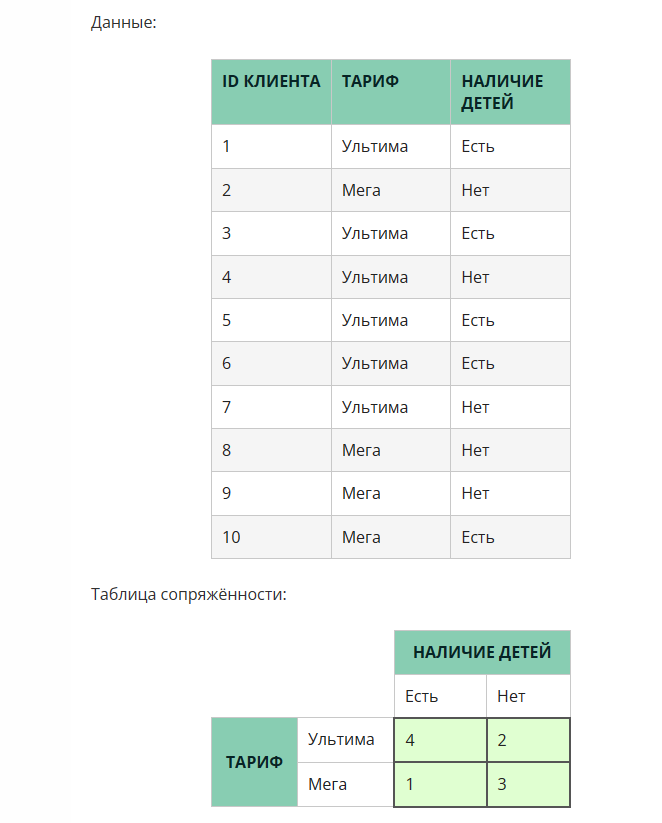

Условие применимости критерия хи-квадрат — наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к [точному критерию Фишера](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D1%81%D1%82_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

Таблицу сопряжённости можно построить с помощью функции [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) библиотеки Pandas. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__
_БИЗНЕС-ЗАДАЧА_

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по 39 случайным клиентам.

Уровень значимости необходимо взять равным 0.05.

__РЕШЕНИЕ__

Сформулируем гипотезы:

Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.
Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.

In [ ]:
import scipy.stats as stats
import pandas as pd

alpha = 0.05
data = pd.read_csv('cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что признаки «Тариф» и «Наличие детей» взаимосвязаны.

Примечание. К хи-квадрат тестам также относятся тесты на гомогенность (goodness of fit) и тест для дисперсий.
[Более подробное описание этих тестов.](https://dtf.ru/gamedev/1270463-semeystvo-testov-hi-kvadrat-chto-u-nih-pod-kapotom-i-kakie-vybrat-dlya-sravneniya-voronok)

## Критерий Мак-Немара
Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Критерий Мак-Немара реализован в функции [mcnemar](https://www.statsmodels.org/dev/generated/statsmodels.stats.contingency_tables.mcnemar.html) модуля stats библиотеки statsmodels.

Основные входные параметры:
* table — таблица сопряжённости размера 2х2.

__ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON__

_БИЗНЕС-ЗАДАЧА_

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

__РЕШЕНИЕ__

Сформулируем гипотезы:

* Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
* Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

alpha = 0.05

data = pd.read_csv('cat_variables_usage.zip')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)
p = res.pvalue # извлекаем значение p-value из результатов теста

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
  print('p-значение большем, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

Примечание. Среди категориальных признаков выделяют порядковые — это признаки, значения которых можно упорядочить: например, уровень образования, удовлетворённость предоставленными услугами и т. д. К таким признакам можно применять непараметрические тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.

Преобразование можно сделать с помощью функции replace библиотеки pandas. На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. Пример выполнения преобразования:

In [ ]:
# создание датасета
data = pd.DataFrame(["среднее профессиональное", "высшее образование", "основное общее", "среднее общее", "основное общее", "среднее профессиональное"], columns=['Уровень образования'])
display(data)

# перевод категориального признака в количественный
data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])
display(data)

,Уровень образования
0,среднее профессиональное
1,высшее образование
2,основное общее
3,среднее общее
4,основное общее
5,среднее профессиональное


,Уровень образования
0,3
1,4
2,1
3,2
4,1
5,3


Выбор теста может казаться непростой задачей, но сейчас необязательно запоминать их все. Главное — понять, что правильный выбор теста зависит:

* от вопроса, на который мы хотим получить ответ;
* от того, связь между данными каких типов мы хотим проверить;
* от того, какие предположения о данных мы делаем.

Если при решении реальной задачи вы будете сомневаться в том, какой тест выбрать, попробуйте найти в статьях или выступлениях на конференциях, с помощью каких тестов отвечали на вопросы, подобные вашему, в других компаниях.

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

alpha = 0.05


data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'],
['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'],
['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'],
['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'],
['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'],
['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'],
['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'],
['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'],
['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'],
['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'],
['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])


table = pd.crosstab(data['Старая форма'], data['Новая форма'])

res = mcnemar(table)
p = res.pvalue

print('p-value = {:.3f}'.format(p))

if p <= alpha:
  print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отбрасываем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований для отбрасывания нулевой гипотезы'.format(alpha))

p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отбрасываем нулевую гипотезу


10. Практика. Статистические тесты в контексте EDA